<a href="https://colab.research.google.com/github/ThiwakornC/Spotter-NBA/blob/main/Spotter_NBAStats_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT Neccessary Libraries

In [ ]:
import sys
import pandas as pd
import numpy as np
import IPython
from IPython.display import display, Markdown, Latex, HTML, IFrame, JSON, Code, Image, YouTubeVideo, clear_output
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

# Load Dataset

In [ ]:
df_teamtotal0 = pd.read_csv("https://raw.githubusercontent.com/ThiwakornC/Spotter-NBA/refs/heads/main/NBA%20Stats_Dataset/Team%20Totals.csv")
df_teamsummary0 = pd.read_csv("https://raw.githubusercontent.com/ThiwakornC/Spotter-NBA/refs/heads/main/NBA%20Stats_Dataset/Team%20Summaries.csv")
df_playertotal0 = pd.read_csv("https://raw.githubusercontent.com/ThiwakornC/Spotter-NBA/refs/heads/main/NBA%20Stats_Dataset/Player%20Totals.csv")
df_playershoot0 = pd.read_csv("https://raw.githubusercontent.com/ThiwakornC/Spotter-NBA/refs/heads/main/NBA%20Stats_Dataset/Player%20Shooting.csv")
df_memo = pd.read_csv("https://raw.githubusercontent.com/ThiwakornC/Spotter-NBA/refs/heads/main/NBA%20Stats_Dataset/Memo.csv")
df_weightandheight = pd.read_csv("https://raw.githubusercontent.com/ThiwakornC/Spotter-NBA/refs/heads/main/NBA%20Stats_Dataset/Weight%20and%20height.csv")
#df_playershoot0.info()

In [ ]:
df_teamtotal0.count()

In [ ]:
#df_teamtotal0.isna()
#df_teamtotal0.query("@df_teamtotal0.isna().any(axis=1)", engine='python').reset_index(drop=True)

# Clean Data

In [ ]:
df_player = df_playertotal0.loc[ : , ['season','player_id', 'player','pos', 'age','experience', 'g' , 'mp','x3pa', 'x3p'] ]
df_player["id:Player"] = df_player["player_id"].astype(str)+ "_" + df_player["player"]
df_player
#df_player.info ()

In [ ]:
print(df_player['player'].value_counts().reset_index(name='count')) #ถ้า 1 คนมีข้อมูลทุกปี 44 Count

In [ ]:
print(df_player['id:Player'].value_counts().reset_index(name='count'))

In [ ]:
Check_85_g = df_player.loc[ df_player['g']  > 82 , :].sort_values('g', ascending=[False])
Check_85_g.head()

In [ ]:
Check_player_31_Eddie_Johnson = df_player.loc[ df_player['player']  == 'Eddie Johnson' , :].sort_values(['id:Player','season','experience','age','g'],ascending=[True,True,False,True,False])
Check_player_31_Eddie_Johnson
#สุ่มตรวจรายชื่อคนปรากฎว่าใน 1 ปีอาจจะมีชื่อคนซ้ำกัน
#Sort เพื่อให้ตัวบนสุดของ g เป็นรวม

In [ ]:
Check_player_31_Gerald_Henderson = df_player.loc[ df_player['player']  == 'Gerald Henderson' , :].sort_values(['season','experience','age','g'],ascending=[True,False,True,False]).reset_index()
Check_player_31_Gerald_Henderson
#ชื่อคนสามารถซ้ำกันได้ gerald henderson sr (NBA) from 1979 until 1992
#ชื่อคนสามารถซ้ำกันได้ gerald henderson jr

In [ ]:
Check_player_31_Gerald_Mike_Dunleavy = df_player.loc[ df_player['player']  == 'Mike Dunleavy' , :].sort_values(['season','experience','age','g'],ascending=[True,False,True,False]).reset_index()
Check_player_31_Gerald_Mike_Dunleavy
#ชื่อคนสามารถซ้ำกันได้ Mike Dunleavy sr (NBA) 1990
#ชื่อคนสามารถซ้ำกันได้ Mike Dunleavy jr
#เล่น 2 ตำแหน่งในปีเดียวกัน ออกมา 3 Line

In [ ]:
threshold = len(df_teamtotal0) * 0.5  # Calculate the threshold for 50% NA values
threshold1 = len(df_teamsummary0) * 0.5
threshold2 = len(df_playertotal0) * 0.5
threshold3 = len(df_playershoot0) * 0.5
df_teamtotal = df_teamtotal0.dropna(thresh=threshold, axis=1)  # Drop columns
df_teamsummary = df_teamsummary0.dropna(thresh=threshold1, axis=1)
df_playertotal = df_playertotal0.dropna(thresh=threshold2, axis=1)
df_playershoot = df_playershoot0.dropna(thresh=threshold3, axis=1)

df_teamtotal = df_teamtotal[df_teamtotal['season'] > 1979]
df_teamsummary = df_teamsummary[df_teamsummary['season'] > 1979]
df_playertotal = df_playertotal[df_playertotal['season'] > 1979]
df_playershoot = df_playershoot[df_playershoot['season'] > 1979]

df_teamtotal = df_teamtotal[df_teamtotal['team'] != 'League Average']
df_teamsummary = df_teamsummary[df_teamsummary['team'] != 'League Average']
df_playertotal = df_playertotal[df_playertotal['tm'] != 'TOT']
df_playershoot = df_playershoot[df_playershoot['tm'] != 'TOT']

In [64]:
#df_playershoot.duplicated()
#display(df_playershoot.duplicated().value_counts())
df_playershoot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15156 entries, 0 to 16784
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   seas_id                        15156 non-null  int64  
 1   season                         15156 non-null  int64  
 2   player_id                      15156 non-null  int64  
 3   player                         15156 non-null  object 
 4   pos                            15156 non-null  object 
 5   age                            15156 non-null  int64  
 6   experience                     15156 non-null  int64  
 7   lg                             15156 non-null  object 
 8   tm                             15156 non-null  object 
 9   g                              15156 non-null  int64  
 10  mp                             15156 non-null  int64  
 11  fg_percent                     15053 non-null  float64
 12  avg_dist_fga                   15053 non-null  floa

# Analysis

## Part 1: Basketball & Stephen Curry

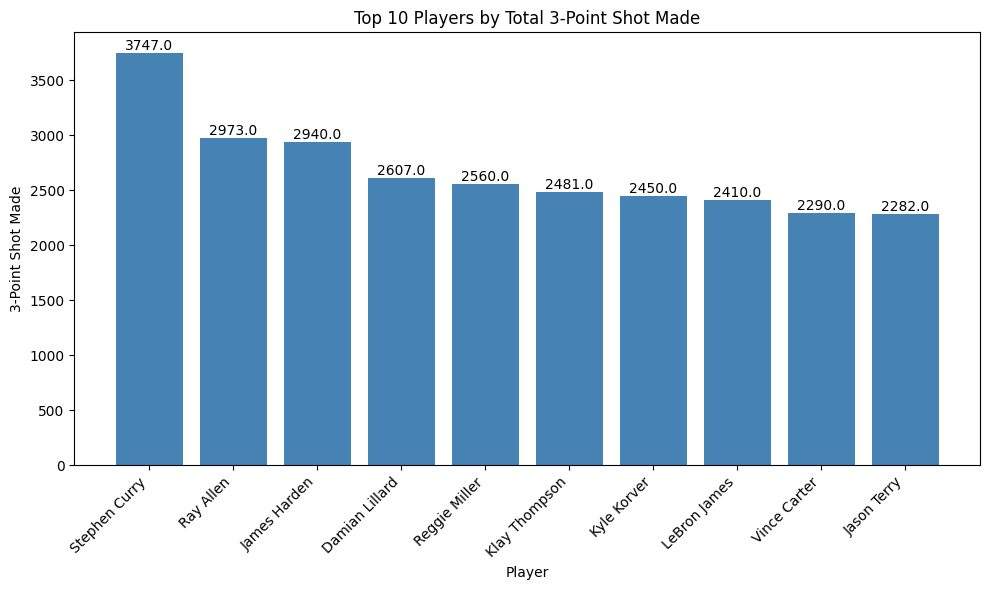

In [ ]:
# คำนวณผลรวมการยิง 3 คะแนนที่ทำได้ของแต่ละผู้เล่น
top_10_players = df_playertotal.groupby('player')['x3p'].sum().nlargest(10).reset_index()

# สร้างกราฟแท่งสำหรับผู้เล่น 10 อันดับแรก
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_players['player'], top_10_players['x3p'], color='steelblue')

# เพิ่มค่าไว้บนแท่งกราฟ
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom')

# หมุนชื่อแกน x
plt.xticks(rotation=45, ha='right')

# ตั้งชื่อแกนและชื่อกราฟ
plt.title('Top 10 Players by Total 3-Point Shot Made')
plt.xlabel('Player')
plt.ylabel('3-Point Shot Made')

# แสดงกราฟ
plt.tight_layout()
plt.show()


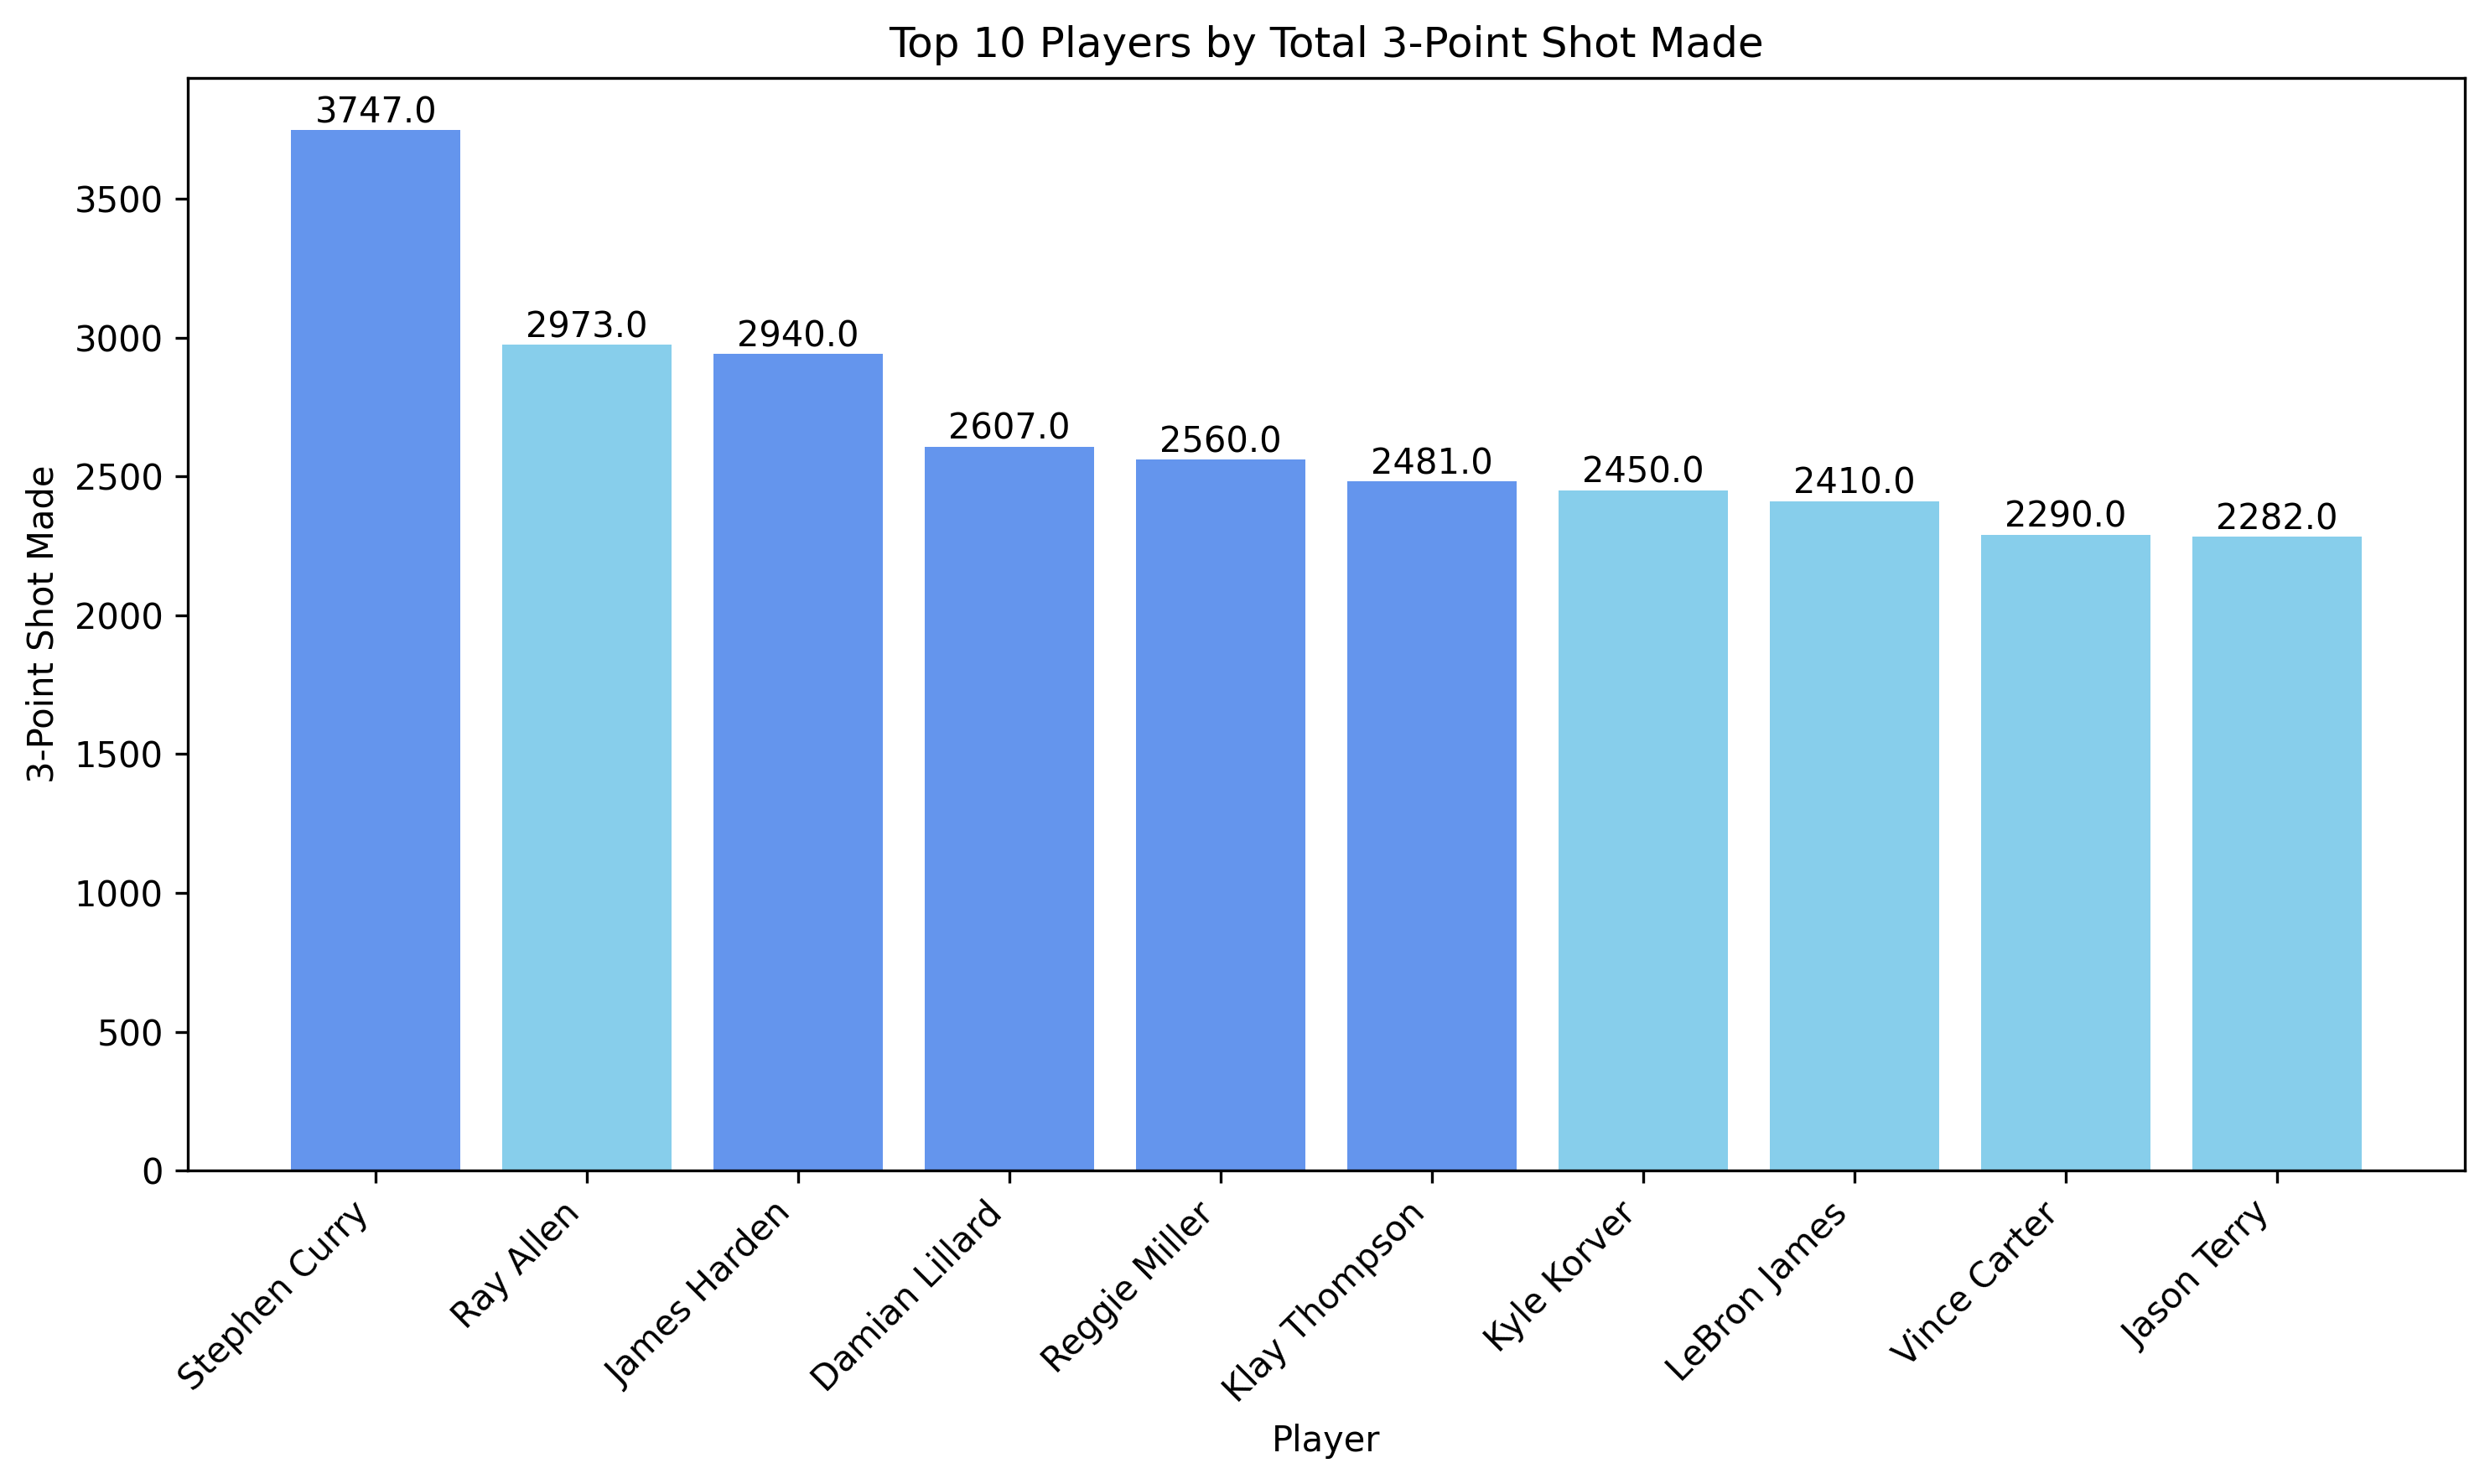

In [ ]:
# Create a new column 'Player-Season' by combining player name and season
df_playertotal['Player-Season'] = df_playertotal['player'] + '-' + df_playertotal['season'].astype(str)

# Calculate the total 3-Point shots made (x3p) and 3-Point attempts (x3pa) for each player
player_3p_totals = df_playertotal.groupby('player')['x3p'].sum()
player_3pa_totals = df_playertotal.groupby('player')['x3pa'].sum()

# Calculate the 3-Point shooting percentage (x3p_percent = x3p / x3pa * 100)
player_x3p_percent = (player_3p_totals / player_3pa_totals) * 100

# Create a DataFrame for the top 10 players by total 3-Point shots made
top_10_by_total_x3p_with_experience = pd.DataFrame({
    'player': player_3p_totals.index,
    'x3pa': player_3pa_totals.values,  # Add the 3-point attempts column
    'x3p': player_3p_totals.values,
    'x3p_percent': player_x3p_percent.values
}).sort_values(by='x3p', ascending=False).head(10)

# Calculate the max experience for each player
max_experience = df_playertotal.groupby('player')['experience'].max()

# Add the 'max_experience' column to the DataFrame
top_10_by_total_x3p_with_experience['max_experience'] = top_10_by_total_x3p_with_experience['player'].map(max_experience)

# Reorder the columns to place 'x3p' before 'x3pa'
top_10_by_total_x3p_with_experience_reordered = top_10_by_total_x3p_with_experience[['player', 'x3p', 'x3pa', 'x3p_percent', 'max_experience']]

# Reset the index of the DataFrame
top_10_by_total_x3p_with_experience_reordered_reset = top_10_by_total_x3p_with_experience_reordered.reset_index(drop=True)


# Plot the bar chart for 3-Point shots made (x3p) by the top 10 players
players = top_10_by_total_x3p_with_experience_reordered_reset['player']
x3p_values = top_10_by_total_x3p_with_experience_reordered_reset['x3p']

plt.figure(figsize=(10, 6), dpi=300)

# Color only bars at positions 1, 3, 4, 5, and 6 differently
colors = ['cornflowerblue' if i in [0, 2, 3, 4, 5] else 'skyblue' for i in range(len(players))]

# Create bar chart with custom colors
bars = plt.bar(players, x3p_values, color=colors)

# Add labels and title
plt.xlabel('Player')
plt.ylabel('3-Point Shot Made')
plt.title('Top 10 Players by Total 3-Point Shot Made')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

# Display the chart
plt.tight_layout()
plt.show()


In [ ]:
# Filter data for Stephen Curry and seasons since 2010
stephen_curry_data = df_playertotal[
    (df_playertotal['player'] == 'Stephen Curry') & (df_playertotal['season'] >= 2010)
]

# Group data by season and calculate total x3p and x3pa
grouped_data = stephen_curry_data.groupby('season')[['x3p', 'x3pa']].sum()

# Get seasons and x3p/x3pa values
seasons = grouped_data.index
x3p_values = grouped_data['x3p']
x3pa_values = grouped_data['x3pa']

# Set bar width
bar_width = 0.35

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

# Plot x3p bars with opacity
x3p_bars = ax.bar(
    seasons, x3p_values, bar_width, label='3-Point Made', color='skyblue', alpha=0.3
)
x3p_bars[seasons.get_loc(2016)].set_alpha(1)  # Set opacity for 2016 to 1

# Plot x3pa bars with opacity
x3pa_bars = ax.bar(
    seasons + bar_width,
    x3pa_values,
    bar_width,
    label='3-Point Attempted',
    color='lightcoral',
    alpha=0.3,
)
x3pa_bars[seasons.get_loc(2016)].set_alpha(1)  # Set opacity for 2016 to 1

# Add values on top of bars
for bar in x3p_bars + x3pa_bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        int(height),
        ha='center',
        va='bottom',
        fontsize=7,
    )

# Customize the plot
ax.set_xlabel('Season (Year)')
ax.set_ylabel('Count (Shot)')
ax.set_title('Stephen Curry: 3-Point Made/Attempted per Season (2010-2024)')
ax.set_xticks(seasons + bar_width / 2)
ax.set_xticklabels(seasons, rotation=45, ha='right')
ax.legend(fontsize=8)

# Show the plot
plt.show()

## Part 2: Trend of 3 Points

In [ ]:
df_3pa_trend = df_playertotal.loc[:, ['season','x3pa', 'x3p', 'x2pa', 'x2p','orb', 'drb' , 'trb', 'ft', 'fta','fg', 'fga','pts' ]]
df_groupby_year = df_3pa_trend.groupby(['season'])[['x3pa','x3p', 'x2pa', 'x2p','orb', 'drb' , 'trb', 'ft', 'fta','fg','fga','pts']].agg('sum')
df_groupby_year['3pts'] = (df_groupby_year['x3p']*3) #Get 3 Score
df_groupby_year['2pts'] = (df_groupby_year['x2p']*2) #Get 2 Score
df_groupby_year['3pts%'] = ((df_groupby_year['3pts'] / df_groupby_year['pts'])*100).apply(lambda x: round(x,2))
df_groupby_year['2pts%'] = ((df_groupby_year['2pts'] / df_groupby_year['pts'])*100).apply(lambda x: round(x,2))
df_groupby_year['ft%'] = ((df_groupby_year['ft'] / df_groupby_year['pts'])*100).apply(lambda x: round(x,2))
df_groupby_year['x3p_percent'] = ((df_groupby_year['x3p'] / df_groupby_year['x3pa'])*100).apply(lambda x: round(x,2))
df_groupby_year['x2p_percent'] = ((df_groupby_year['x2p'] / df_groupby_year['x2pa'])*100).apply(lambda x: round(x,2))
df_groupby_year['ft_percent'] = ((df_groupby_year['ft'] / df_groupby_year['fta'])*100).apply(lambda x: round(x,2))
df_groupby_year.style.format("{:,}".format, subset=df_groupby_year.select_dtypes(include=['number']).columns)

In [ ]:
x = np.arange(df_groupby_year.index.size) # Use .index to access the index of the DataFrame
fit = np.polyfit(x, df_groupby_year['x3pa'], deg=1)
#print ("Slope : " + str(fit[0]))
#print ("Intercept : " + str(fit[1]))

In [ ]:
fit_function = np.poly1d(fit)
plt.figure(figsize=(10, 6), dpi=300)
#Linear regression plot
plt.plot(df_groupby_year.index, fit_function(x), linestyle='--', label='Linear regression')
#Time series data plot
plt.plot(df_groupby_year.index, df_groupby_year['x3pa'], label='3-Point Attempts')
plt.xlabel('Season')
plt.ylabel('3-Point Attempts (Shot)')
plt.title('3-Point Attempts Trend')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6), dpi=300)
plt.gca().yaxis.set_major_formatter(PercentFormatter())
# Set y-axis limits
plt.ylim(0, 90)
plt.plot(df_groupby_year.index, df_groupby_year['3pts%'], label='3pts%', linestyle='-.')
plt.plot(df_groupby_year.index, df_groupby_year['2pts%'], label='2pts%', linestyle='-.')
plt.plot(df_groupby_year.index, df_groupby_year['ft%'], label='ft%', color='g', linestyle='-.')
plt.xlabel('Season')
plt.ylabel('Percentage')
plt.title('Point_%')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6), dpi=300)
plt.gca().yaxis.set_major_formatter(PercentFormatter())
# Set y-axis limits
plt.ylim(0, 60)
plt.plot(df_groupby_year.index, df_groupby_year['x3p_percent'], label='x3p_percent')
plt.xlabel('Season')
plt.ylabel('Percentage')
plt.title('x3p_percent')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
fit_function = np.poly1d(fit)
plt.figure(figsize=(10, 6), dpi=300)
#Time series data plot
plt.plot(df_groupby_year.index, df_groupby_year['x3pa'], label='3-Point Attempts')
plt.plot(df_groupby_year.index, df_groupby_year['trb'] , label ='Total Rebounds')
plt.xlabel('Season')
plt.ylabel('3-Point Attempts (Shot)')
plt.title('Total Rebound & 3-Point Attempts Trend')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df_3pa_trb_trend = df_groupby_year[['x3pa', 'orb', 'drb' , 'trb']]
df_3pa_trb_trend.style.format("{:,}".format, subset=df_3pa_trb_trend.select_dtypes(include=['number']).columns)
df_3pa_trb_trend.info()

In [ ]:
corr = df_3pa_trb_trend.corr()
plt.figure(figsize=(10,6), dpi=300)
sns.heatmap(corr, cmap="Blues",annot=True)
plt.show()

In [ ]:
fig, axs = plt.subplots(3,1, figsize=(10,10), dpi=300)

enmax_palette = ["#0c68e8", "#e88c0c"] #Code Hex จาก html color code
sns.set_palette(palette=enmax_palette)

sns.regplot(data=df_groupby_year, x="x3pa", y="trb", ax=axs[0], color="C0") #C0 คือสีแรก
sns.regplot(data=df_groupby_year, x="x3pa", y="drb", ax=axs[1], color="C0")
sns.regplot(data=df_groupby_year, x="x3pa", y="orb", ax=axs[2], color="C1")
plt.show()

In [ ]:
df_pos_rb = df_playertotal.loc[ : , ['season','pos','orb', 'drb' , 'trb']]
print(df_pos_rb['pos'].value_counts().reset_index(name='count'))

In [ ]:
df_groupby_pos = df_pos_rb.groupby(['pos'])[['orb', 'drb' , 'trb']].agg('sum').sort_values(by=['trb'], ascending=False).reset_index()
df_groupby_pos = df_groupby_pos.iloc[[0,1,2,3,4]]
df_groupby_pos.style.format("{:,}".format, subset=df_groupby_pos.select_dtypes(include=['number']).columns)

In [ ]:
df_groupby_pos_melt = pd.melt(df_groupby_pos, id_vars=['pos'], value_vars=['orb', 'drb'])
df_groupby_pos_melt.style.format("{:,}".format, subset=df_groupby_pos_melt.select_dtypes(include=['number']).columns)

In [ ]:
plt.figure(
    figsize=(8, 4),  # Set the figure size here
    dpi=300,  # Set the dpi (or resolution) here
)
sns.barplot(df_groupby_pos_melt, x="value", y="pos", hue="variable", palette="deep")
plt.suptitle(
    "Position and Rebound",  # Main title text
    fontsize=18,  # Set the font size
    color="black",  # Set the color
    x=0.51,  # Adjust this to align with the subtitle
    y=1.01,  # Adjust this to align with the subtitle
)
plt.title(
    "Frequency",  # Subtitle text
    fontsize=14,  # Set the font size
    color="grey",  # Set the color
)
plt.xlabel("Rebound Frequency", fontsize=12)  # Set the x-axis label and fontsize
plt.xticks(fontsize=10)  # Set the font size of the x-axis ticks
plt.ylabel("Position", fontsize=12)  # Set the y-axis label and fontsize
plt.yticks(fontsize=10)  # Set the font size of the y-axis ticks
handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(
    handles=handles,
    title="Rebound Type",  # Set a title for the legend
    title_fontsize=12,  # Set the legend title size
    fontsize=10,  # Set the fontsize of the legend labels
    bbox_to_anchor=(1.28, 0.65),  # Customize the position of the legend here
    frameon=False,  # Disable the legend border
    labels=[  "Offensive Rebounds","Defensive Rebounds"] # Customize the labels you want in the legend
)
sns.move_legend(plt.gca(), "upper left", bbox_to_anchor=(1, 1))
# Show the plot
plt.show()

In [ ]:
df_pos_rb = df_pos_rb.loc[ (df_pos_rb['pos'] == 'C') | (df_pos_rb['pos'] == 'PF') | (df_pos_rb['pos'] == 'SF') | (df_pos_rb['pos'] == 'SG') | (df_pos_rb['pos'] == 'PG') , ['season','pos','orb', 'drb' , 'trb']]
df_pos_rb.info()
df_groupby_pos_s = df_pos_rb.groupby(['season','pos'])[['orb', 'drb' , 'trb']].agg('sum').sort_values(by=['season'], ascending=False)
df_groupby_pos_s.style.format("{:,}".format, subset=df_groupby_pos_s.select_dtypes(include=['number']).columns)

In [ ]:
fig, axs = plt.subplots(3,1, figsize=(10,10), dpi=300)

trb_plot = sns.lineplot(data=df_groupby_pos_s, x="season", y="trb" ,hue='pos', palette="deep" ,marker = "o", ax=axs[0])
orb_plot = sns.lineplot(data=df_groupby_pos_s, x="season", y="orb" ,hue='pos', palette="deep" ,marker = "o", ax=axs[1] , legend=False)
drb_plot = sns.lineplot(data=df_groupby_pos_s, x="season", y="drb" ,hue='pos', palette="deep" ,marker = "o", ax=axs[2] , legend=False)

sns.move_legend(trb_plot, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
df_player = df_playertotal.loc[ : , ['season','player_id', 'player','pos', 'age','experience', 'g' , 'mp','x3pa', 'x3p'] ]
df_player["id:Player"] = df_player["player_id"].astype(str)+ "_" + df_player["player"]
df_player_sort = df_player.sort_values(['id:Player','season','experience','age','g'],ascending=[True,True,False,True,False])
df_player_dup = df_player_sort.drop_duplicates(subset=['id:Player','season'], keep='first')
df_id_player = df_player_dup.groupby(['id:Player','pos'])[['x3pa','x3p', 'g', 'mp']].agg('sum').reset_index()
df_id_player

In [ ]:
top_5_pos = df_id_player['pos'].value_counts().nlargest(5).index.tolist()
df_top5 = df_id_player[df_id_player['pos'].isin(top_5_pos)]

# Get the top 5 players by 3-point percentage (x3p)
top_1_players = df_top5.nlargest(1, 'x3p')

# Create a figure with three subplots and less space at the bottom for the legend
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 9), dpi=300)

# First subplot: 3-Point Attempts vs 3-Point Percentage
sns.scatterplot(data=df_top5, x='x3pa', y='x3p',
                hue='pos', size='x3p',
                sizes=(20, 2000), alpha=0.7, legend='brief', ax=ax1)

# Add annotations for top 5 players
for idx, row in top_1_players.iterrows():
    ax1.annotate(row['id:Player'], (row['x3pa'], row['x3p']),
                 xytext=(0, -10), textcoords='offset points',
                 fontsize=15, fontweight='bold', alpha=1,
                 ha='center', va='top')

ax1.set_title('3-Point Attempts vs 3-Point\n(Top 1 Player Labeled)', fontsize=16)
ax1.set_xlabel('3-Point Attempts (x3pa)', fontsize=14)
ax1.set_ylabel('3-Point (x3p)', fontsize=14)

# Second subplot: Minutes Played vs 3-Point Percentage
sns.scatterplot(data=df_top5, x='mp', y='x3p',
                hue='pos', size='x3p',
                sizes=(20, 2000), alpha=0.7, legend='brief', ax=ax2)

# Add annotations for top 5 players
for idx, row in top_1_players.iterrows():
    ax2.annotate(row['id:Player'], (row['mp'], row['x3p']),
                 xytext=(0, -10), textcoords='offset points',
                 fontsize=15, fontweight='bold', alpha=1,
                 ha='center', va='top')

ax2.set_title('Minutes Played vs 3-Point\n(Top 1 Player Labeled)', fontsize=16)
ax2.set_xlabel('Minutes Played (mp)', fontsize=14)
ax2.set_ylabel('3-Point (x3p)', fontsize=14)

# Third subplot: Games vs 3-Point Percentage
sns.scatterplot(data=df_top5, x='g', y='x3p',
                hue='pos', size='x3p',
                sizes=(20, 2000), alpha=0.7, legend='brief', ax=ax3)

# Add annotations for top 5 players
for idx, row in top_1_players.iterrows():
    ax3.annotate(row['id:Player'], (row['g'], row['x3p']),
                 xytext=(0, -10), textcoords='offset points',
                 fontsize=15, fontweight='bold', alpha=1,
                 ha='center', va='top')

ax3.set_title('Games vs 3-Point\n(Top 1 Player Labeled)', fontsize=16)
ax3.set_xlabel('Games (g)', fontsize=14)
ax3.set_ylabel('3-Point (x3p)', fontsize=14)

# Adjust layout
plt.tight_layout()

# Move legend outside the plots with a single row
handles, labels = ax3.get_legend_handles_labels()
fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, 0.05),
           ncol=len(handles), fontsize=14, markerscale=2, frameon=True,
           fancybox=True, shadow=True, borderpad=1, columnspacing=2,
           handletextpad=0.5, title='Position', title_fontsize=16)

# Remove individual legends from subplots
ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()

# Adjust the subplot layout to make room for the legend
plt.subplots_adjust(bottom=0.18, wspace=0.3)

plt.show()

## Part 3: Case Study - Boston Celtics Winner in 2024 with 3 Points

In [ ]:
# Filter data for seasons since 2010
filtered_df = df_teamtotal[df_teamtotal['season'] >= 2010]

# Calculate the total x3pa for each team since 2010
team_total_x3pa = filtered_df.groupby('team')['x3pa'].sum().sort_values(ascending=False)

# Get the top 5 teams
top_5_teams = team_total_x3pa.head(5).index

# Filter the DataFrame for the top 5 teams
filtered_df = filtered_df[filtered_df['team'].isin(top_5_teams)]

# Find the highest x3pa for each season
highest_x3pa_each_season = filtered_df.loc[filtered_df.groupby('season')['x3pa'].idxmax()]

# Create a dictionary to map team names to abbreviations
team_abbreviations = dict(zip(df_teamtotal['team'], df_teamtotal['abbreviation']))

# Create the scatter plot
plt.figure(figsize=(10, 6), dpi=300)

# Create a dictionary to store legend handles and colors
legend_handles = {}

# Plot all points for top 5 teams with reduced opacity
for team in top_5_teams:
    team_data = filtered_df[filtered_df['team'] == team]
    abbreviation = team_abbreviations.get(team, team)  # Get the abbreviation for the team
    scatter = plt.scatter(team_data['season'], team_data['x3pa'], label=abbreviation, alpha=0.5)

    # Store the handle and color in the dictionary
    legend_handles[f"{abbreviation}:{team}"] = scatter


# Plot the highest x3pa points with border and x3pa:abbreviation
for index, row in highest_x3pa_each_season.iterrows():
    abbreviation = team_abbreviations.get(row['team'], row['team'])
    plt.scatter(row['season'], row['x3pa'], linewidths=0.5, s=100,
                edgecolors='black', facecolors='none')  # Highlight with black border
    text = f"{abbreviation}:{int(row['x3pa'])}"  # Format as x3pa:abbreviation
    plt.text(row['season'], row['x3pa'], text, ha='center', va='bottom', rotation=10,size=7)

# Add labels and title
plt.xlabel('Season (Year)')
plt.ylabel('3-Point Attempted (Shot)')
plt.title('3-Point Attempted per Season for Top 5 Teams (2010-2014)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Create the legend with matching colors
legend_labels = list(legend_handles.keys())
handles = list(legend_handles.values())
plt.legend(handles, legend_labels, loc='best',fontsize=8)  # Use stored handles and labels

# Show the plot
plt.show()

In [ ]:
# Filter data for Boston Celtics and seasons between 2010 and 2024
boston_celtics_data = df_teamtotal[
    (df_teamtotal['team'] == 'Boston Celtics')
    & (df_teamtotal['season'] >= 2010)
    & (df_teamtotal['season'] <= 2024)
]

# Create the line chart
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(
    boston_celtics_data['season'],
    boston_celtics_data['x3pa'],
    marker='o',
    linestyle='-',
    color='darkorchid',
    alpha=0.5
)

# Add values on markers
for x, y in zip(boston_celtics_data['season'], boston_celtics_data['x3pa']):
    plt.text(x, y, str(int(y)), ha='center', va='bottom', fontsize=8, rotation=15)

# Customize the plot
plt.xlabel('Season (Year)')
plt.ylabel('3-Point Attempted (Shot)')
plt.title('Boston Celtics: 3-Point Attempted per Season (2010-2024)', color='indigo')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()